<a href="https://colab.research.google.com/github/mpatrini7/DataLAB42/blob/main/Week2/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Part 1***

In [ ]:
import numpy as np

**1.Create an array of ten zeros**

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**2.Create an array of ten ones**

In [ ]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

**3.Create an array of integers from 10 to 50**

In [ ]:
np.arange(10, 51, 1)

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50])

**4.Create array of all the even integers from 10 to 50**

In [ ]:
np.arange(10, 51, 2)


array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
       44, 46, 48, 50])

**5.Create a 3x3 identity matrix**

In [ ]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

**6.Generate a random number between 0 and 1**

In [ ]:
np.random.random()

0.5391542867172957

***7.Create the following matrix:***

In [ ]:
np.linspace(0, 1, 10)

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

# ***Part 2***

In [ ]:
import matplotlib.pyplot as plt

**1.Create a matrix of random values of distribution of your choice**

In [ ]:
np.random.rand(3, 3)

array([[0.65878983, 0.69727017, 0.48492124],
       [0.21574068, 0.22601696, 0.1756538 ],
       [0.50304821, 0.52944987, 0.37080815]])

**2.Create a 1-dimensional array of 12 sequential numbers and convert it to a 4x3 array.**

In [ ]:
np.reshape(np.arange(1, 13), (4,3))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

**3.Write a function that creates an incremental array of dimension (1,n) with values between 0 and 1. Use arr.shape to verify.**

In [ ]:
def incr_arr(num):
  return np.reshape(np.linspace(0, 1, num), (1, num))

incr_arr(10)

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [ ]:
incr_arr(10).shape

(1, 10)

**4.Generate a 10x12 array and extract row 0-4 of columns 8-12.**

In [ ]:
a = np.random.randn(10, 12)
a.shape

(10, 12)

In [ ]:
a

array([[ 1.14207846e+00,  1.99821758e+00,  8.03751927e-01,
         2.35732788e-03,  8.75673280e-02, -1.46903795e-01,
        -2.16199548e-01, -9.36758560e-01, -1.43215417e+00,
         1.17469396e-01, -1.59372914e+00,  3.67354312e-01],
       [-1.27685750e+00, -1.24099234e+00, -9.78922853e-01,
         1.27023866e+00, -6.75622454e-01, -1.80648515e+00,
        -3.46984055e-01, -3.00840857e-01,  9.90732938e-02,
         1.74840099e+00,  1.65002367e+00,  3.84217883e-01],
       [-3.07066622e+00, -7.54965423e-01,  3.25015285e+00,
         5.75003927e-01,  9.50218608e-01, -1.40136217e+00,
         2.93616725e-01, -1.76460963e+00,  3.98966030e-01,
         4.60495872e-01, -1.99022310e+00, -3.35906956e-01],
       [-9.68133019e-01,  7.76980600e-01, -1.13530212e-01,
         8.20044742e-02, -1.59114350e-01, -3.92022893e-01,
         1.11669064e+00, -5.21106270e-01,  2.95260523e+00,
        -4.94668827e-01, -2.42212925e-01, -2.39953866e-01],
       [-4.25477444e-01, -1.13155103e+00, -1.2450748

In [ ]:
a[0:5, 7:12]

array([[-0.93675856, -1.43215417,  0.1174694 , -1.59372914,  0.36735431],
       [-0.30084086,  0.09907329,  1.74840099,  1.65002367,  0.38421788],
       [-1.76460963,  0.39896603,  0.46049587, -1.9902231 , -0.33590696],
       [-0.52110627,  2.95260523, -0.49466883, -0.24221293, -0.23995387],
       [-0.25192255, -1.57492363,  1.7658984 ,  1.49801367, -1.38764431]])

**5.Using the function in Q3, get m vectors and bind them together (to have a m x n) matrix. Plot the matrix with matplotlib’s imshow.**

In [ ]:
m = incr_arr(10)
m

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [ ]:
m2 = incr_arr(10)
m2

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [ ]:
m3 = incr_arr(10)
m3

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

In [ ]:
matrix = np.concatenate((m, m2))
matrix

array([[0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ],
       [0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
        0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]])

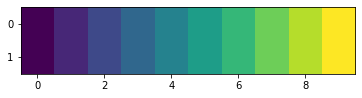

In [ ]:
plt.imshow(matrix)

**6.Multiply the resulting matrix from Q5 with the matrix of a picture of your choice. Plot the resulting matrix.**

In [ ]:
import matplotlib.image as mpimg

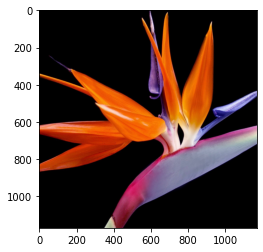

In [ ]:
img = mpimg.imread("/content/drive/MyDrive/sterlizia.jpeg", 0)
plt.imshow(img)

In [ ]:
img.shape

(1170, 1170, 3)

In [ ]:
np.concatenate((incr_arr(9).reshape(3), img))

ValueError: ignored